# Business objective:

Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. 

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1> If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2> If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Goals of data analysis: 
Analyze How to reduce Charge Offs.


In [1]:
#Initialize all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import chardet

##### Data Collection
1.	Load Data from Loan.csv file


In [2]:
# To Find out encoding type of loan.csv
with open('loan.csv','rb') as rawdata:
    result = chardet.detect(rawdata.read(2000))

print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
# Since the encoding is 'ascii' we need to use encoding = "ISO-8859-1"
loan_df = pd.read_csv('loan.csv', encoding = "ISO-8859-1") 

##### Common Functions

In [4]:
# Common function to understand data 
def data_understand(df):
    print(df.shape)
    print(df.info())
    print(df.describe())


In [5]:
# Common function to check null, Nan, Missing Values
def null_check(df):
#    print(df.isnull().sum())
    if df.isnull().sum().sum() > 0:
        null_total = df.isnull().sum().sort_values(ascending=False) 
        total = null_total[null_total > 0]

        null_percent = round(df.isnull().mean().sort_values(ascending=False)*100,2)
        percent = null_percent[null_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')

In [6]:
# replace_text 
def replace_cln(df, col_name, original, new ):
    df[col_name] = df[col_name].str.replace(original,new)
    return df

In [7]:
# Get a series object containing the count of unique elements
# in each column of dataframe
def uniqueval(df):
    uniqueValues = df.nunique()
    print('Count of unique values in each column :')
    print(uniqueValues)

In [8]:
# To Find out Number of Unique Values and the actual Unique Values.
def uniquecol(df, colname):
    print(clean_df[colname].nunique())
    print(clean_df[colname].unique())

In [9]:
# To Remove NANs / Null Coulums and Lows and to Drop columns that have same values
def datacleaning(df):

    # Drop columns and Rows that have no Data.
    clean_data = df.dropna(axis='columns',how='all')
    clean_data = clean_data.dropna(axis='rows',how='all')

    #Drop columns that have same values
    clean_unique_data = clean_data.nunique().sort_values()
    unique_cols= clean_unique_data[clean_unique_data==1].index
    clean_data.drop(columns=unique_cols,axis=1,inplace=True)

    #Ignore columns that have atleast one-fifth of Nil values 
    clean_data = clean_data.loc[:, (clean_data.isnull().sum(axis=0) <= len(clean_data)/3)]
    

    #Now get the final size and remaining columns
    print(clean_data.shape)
    return clean_data

##### Data Understanding

In [10]:
# Let's understand loan Data
data_understand(loan_df)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.31513

In [11]:
# Let's Analyse data inside loan_df
null_check(loan_df)

Total and Percentage of NaN:
                            Total  Percent
verification_status_joint  39717   100.00
annual_inc_joint           39717   100.00
mo_sin_old_rev_tl_op       39717   100.00
mo_sin_old_il_acct         39717   100.00
bc_util                    39717   100.00
...                          ...      ...
chargeoff_within_12_mths      56     0.14
revol_util                    50     0.13
tax_liens                     39     0.10
title                         11     0.03
last_credit_pull_d             2     0.01

[68 rows x 2 columns]


#### Data Understanding

In [12]:
loan_df.sample(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
856,1048482,1279818,30000,18550,18550.000000,60 months,20.30%,494.57,E,E5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
31377,495541,634751,6400,6400,6400.000000,36 months,7.51%,199.10,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
14751,760737,961048,12400,12400,12400.000000,36 months,13.49%,420.74,C,C2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
21456,642868,822769,6025,6025,5525.000000,36 months,6.54%,184.77,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
27072,558882,719438,4000,4000,3500.000000,36 months,11.12%,131.19,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
32392,482840,614278,12000,12000,11950.000000,36 months,13.11%,404.94,C,C2,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN
38201,362592,372090,9000,9000,3724.453024,36 months,15.57%,314.51,E,E3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
23724,609232,781466,10000,7125,7125.000000,36 months,5.79%,216.08,A,A2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1797,1045966,1237299,16000,16000,16000.000000,60 months,22.35%,445.10,F,F5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
19158,680409,869207,13700,13700,13692.234800,60 months,10.74%,296.10,B,B4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data cleaning

### Now we have 2 options to address Missing Values
1. Drop NAN or 0 Values 
2. Replace with representative Values. 

In [13]:
# Let's remove Columns,rows with NANs and unique values = 1. 
clean_df = datacleaning(loan_df)

(39717, 45)


In [14]:
null_check(clean_df)

Total and Percentage of NaN:
                       Total  Percent
desc                  12940    32.58
emp_title              2459     6.19
emp_length             1075     2.71
pub_rec_bankruptcies    697     1.75
last_pymnt_d             71     0.18
revol_util               50     0.13
title                    11     0.03
last_credit_pull_d        2     0.01


In [15]:
data_understand(clean_df)

(39717, 45)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verificati

In [16]:
clean_df.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
30529,506849,653564,3600,3600,3100.00000,36 months,12.73%,120.84,C,C1,...,3735.35,3600.0,737.83,0.0,0.0,0.0,Jan-13,601.18,May-16,0.0
23741,608991,781163,4800,4800,4800.00000,36 months,10.36%,155.70,B,B5,...,5364.43,4800.0,564.43,0.0,0.0,0.0,Apr-12,2875.92,Mar-14,0.0
34919,444428,541848,25000,25000,23223.40864,36 months,15.65%,874.66,D,D4,...,28603.38,25000.0,6093.91,0.0,0.0,0.0,Feb-12,7496.13,Feb-12,0.0
39264,243737,241476,7000,7000,3522.73000,36 months,9.76%,225.09,B,B2,...,4049.24,7000.0,1102.92,0.0,0.0,0.0,Feb-11,236.33,Feb-16,NaN
22006,635269,813794,1200,1200,1200.00000,60 months,9.62%,25.28,B,B3,...,1516.24,1200.0,316.24,0.0,0.0,0.0,Jan-16,24.71,Dec-15,0.0


In [17]:
# Ensure that all columns with unique values = 1 are removed
uniqueval(clean_df)

Count of unique values in each column :
id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
rev

## Let's understand each column and Analyze

### Let's Analyse 'loan_amnt', 'funded_amnt', 'funded_amnt_inv'

loan_amnt --> The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

funded_amnt --> The total amount committed to that loan at that point in time.

funded_amnt_inv --> The total amount committed by investors for that loan at that point in time.



In [18]:
clean_df.groupby(by=['loan_amnt','funded_amnt','funded_amnt_inv'])['id'].count().reset_index()

,loan_amnt,funded_amnt,funded_amnt_inv,id
0,500,500,400.00000,1
1,500,500,450.00000,1
2,500,500,475.00000,1
3,500,500,500.00000,2
4,700,700,700.00000,1
...,...,...,...,...
12003,35000,35000,34993.26306,1
12004,35000,35000,34993.32571,1
12005,35000,35000,34993.65539,1
12006,35000,35000,34997.35245,1


In [19]:
def univariate_plot(variable):
    plt.figure(figsize=(10,5))
    plt.xlabel('xlabel', fontsize=20)
    plt.ylabel('ylabel', fontsize=20)
    plt.title('Plot for '+ str(variable), fontdict={'fontsize':30})
    sns.countplot(x=variable, data=clean_df)
    plt.show()

In [20]:
uniquecol(clean_df, 'term')

2
[' 36 months' ' 60 months']


In [21]:
replace_cln(clean_df,'term',' months', '')
uniquecol(clean_df, 'term')

2
[' 36' ' 60']


### Analyse loan_status

loan_status --> Current status of the loan

In [22]:
# Loan Status - Convert loan_status to lower, remove any spaces and find unique values.
clean_df['loan_status']=clean_df['loan_status'].str.strip().str.lower()
uniquecol(clean_df, 'loan_status')
print(clean_df.groupby(['loan_status'], as_index=False).size().reset_index())#name='counts'))

3
['fully paid' 'charged off' 'current']
   index  loan_status   size
0      0  charged off   5627
1      1      current   1140
2      2   fully paid  32950


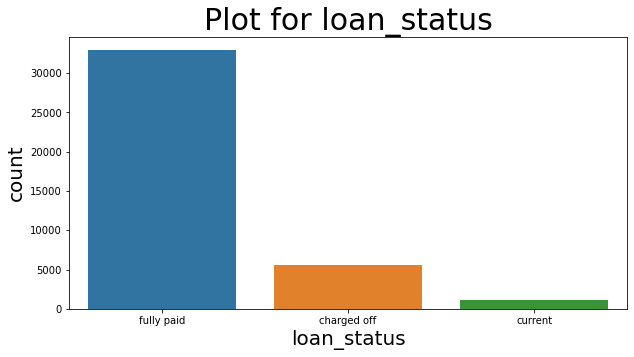

In [23]:
univariate_plot('loan_status')

### Let's not remove Null / NAN values as we may lose information at the later stage hence 
1. Immute with Representative Values

2. Also let's explore possibilities of derived columns.

### Let's Analyse 'emp_length', 'issue_date_dt', 'dti'

emp_length -->Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

issue_date_dt -->The month which the loan was funded

dti -->A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [24]:
clean_df['emp_length']=clean_df['emp_length'].str.strip().str.replace(' years','').str.replace('+','').str.replace('< 1','0').str.replace(' year','')
clean_df.emp_length.fillna(value='Not Disclosed',inplace=True)
uniquecol(clean_df, 'emp_length')


12
['10' '0' '1' '3' '8' '9' '4' '5' '6' '2' '7' 'Not Disclosed']


In [25]:
clean_df['issue_date_dt']=pd.to_datetime(clean_df['issue_d'],format='%b-%y')
print(clean_df.issue_date_dt.describe())

count                   39717
unique                     55
top       2011-12-01 00:00:00
freq                     2260
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_date_dt, dtype: object


In [26]:
# Dti - Identify the unique values
uniquecol(clean_df, 'dti')

2868
[27.65  1.    8.72 ...  1.79  0.12 25.43]


### Analyse 'delinq_2yrs' ,'int_rate_f', 'installment', 'pub_rec' ,'pub_rec_bankruptcies'

delinq_2yrs --> The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

int_rate -->Interest Rate on the loan

installment -->The monthly payment owed by the borrower if the loan originates.

pub_rec -->Number of derogatory public records

pub_rec_bankruptcies -->Number of public record bankruptcies

In [27]:
#delinq_2yrs - Number of 30+ months passed after delinquecy incidents in last 2 years.
print('--- delinq_2yrs ----\n')
uniquecol(clean_df, 'delinq_2yrs')
print(clean_df.groupby(by='delinq_2yrs')['id'].count())

--- delinq_2yrs ----

11
[ 0  2  3  1  4  6  5  8  7  9 11]
delinq_2yrs
0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: id, dtype: int64


In [28]:
uniquecol(clean_df, 'delinq_2yrs')

11
[ 0  2  3  1  4  6  5  8  7  9 11]


In [29]:
#int_rate - apply the string cleaning and validate the nunique values
clean_df['int_rate_f']= clean_df['int_rate'].str.replace('%','').astype(float)
uniquecol(clean_df, 'int_rate_f')

371
[10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14
 11.11 10.37 16.4   7.66 10.   18.62 10.74  5.79  6.92  9.63 14.54 12.68
 19.36 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12.23 12.61 10.36
  6.17  6.54  9.25 16.69 15.95  8.88 13.35  9.62 16.32 12.98 14.83 13.72
 14.09 14.46 20.03 17.8  15.2  15.57 18.54 19.66 17.06 18.17 17.43 20.4
 20.77 18.91 21.14 17.44 13.23  7.88 11.12 13.61 1

In [30]:
uniquecol(clean_df, 'installment')

print(clean_df.installment.median())


15383
[162.87  59.83  84.33 ...  78.42 275.38 255.43]
280.22


In [31]:
uniquecol(clean_df, 'pub_rec')

5
[0 1 2 3 4]


In [32]:
clean_df.pub_rec_bankruptcies.fillna(value='Not Known',inplace=True)
uniquecol(clean_df, 'pub_rec_bankruptcies')

4
[0.0 1.0 2.0 'Not Known']


In [33]:
# last_credit_pull_dt - Conver the format and validate the dates.
clean_df['last_credit_pull_dt']=pd.to_datetime(clean_df['last_credit_pull_d'],format='%b-%y')
print(clean_df['last_credit_pull_dt'].min())
print(clean_df['last_credit_pull_dt'].max())

2007-05-01 00:00:00
2016-05-01 00:00:00


In [34]:
clean_df.emp_title.describe()
clean_df['emp_title_provided'] = np.where(np.logical_or(clean_df['emp_title'].isnull(), clean_df['emp_title'].str.strip() == ''), False, True)
clean_df['emp_title_provided'] = clean_df['emp_title_provided'].apply(lambda x: 'Disclosed' if x is True else 'Not Disclosed')


In [35]:
clean_df.title.describe()
clean_df.title.head(5)

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

### Remove Outliers 
In Exceptional scenario someone with USD 1 Million Annual income would be spending efforts for USD10 K to USD30K loan. Hence we could safely remove these outliers 

In [36]:
print(clean_df.annual_inc.describe())

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [37]:
qnt = clean_df.annual_inc.quantile(0.99)
clean_df = clean_df[clean_df.annual_inc < qnt]
print(clean_df.annual_inc.describe())

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64


In [38]:
clean_df.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_date_dt,int_rate_f,last_credit_pull_dt,emp_title_provided
14427,765726,966659,35000,35000,34763.23521,60,20.62%,939.41,F,F2,...,0.00,0.0000,Jun-13,10749.99,Dec-14,0.0,2011-05-01,20.62,2014-12-01,Disclosed
31058,500207,642336,3000,3000,3000.00000,36,10.62%,97.68,B,B3,...,0.00,0.0000,Mar-12,1295.98,Mar-12,0.0,2010-04-01,10.62,2012-03-01,Disclosed
20763,650196,831743,15000,15000,15000.00000,60,14.91%,356.15,D,D2,...,0.00,0.0000,Aug-13,9245.62,Aug-13,0.0,2011-01-01,14.91,2013-08-01,Disclosed
23484,608877,781031,8000,8000,7950.00000,60,9.25%,167.04,B,B2,...,308.56,52.1622,Oct-14,167.04,Mar-15,0.0,2010-11-01,9.25,2015-03-01,Not Disclosed
28071,541733,699186,25000,17575,17201.59019,36,10.75%,573.31,B,B2,...,0.00,0.0000,Jul-13,613.26,Jul-13,0.0,2010-07-01,10.75,2013-07-01,Disclosed
14254,768516,969826,10000,10000,10000.00000,36,9.99%,322.63,B,B1,...,0.00,0.0000,Jun-14,343.54,Jun-14,0.0,2011-05-01,9.99,2014-06-01,Disclosed
8885,858949,1071615,2400,2400,2400.00000,36,5.99%,73.01,A,A2,...,0.00,0.0000,Aug-12,1786.00,Apr-15,0.0,2011-08-01,5.99,2015-04-01,Disclosed
4699,998194,1223321,16800,16800,16800.00000,36,16.77%,597.05,D,D2,...,729.53,7.1000,Sep-12,597.05,Feb-15,0.0,2011-10-01,16.77,2015-02-01,Disclosed
34975,442982,538542,7000,7000,6975.00000,36,7.74%,218.54,A,A3,...,0.00,0.0000,Aug-11,3137.46,Jul-11,0.0,2009-09-01,7.74,2011-07-01,Disclosed
3268,1021952,1250923,2300,2300,2300.00000,36,7.90%,71.97,A,A4,...,0.00,0.0000,Aug-14,289.62,May-16,0.0,2011-11-01,7.90,2016-05-01,Disclosed


### Analyse Home Ownership

In [39]:
uniquecol(clean_df, 'home_ownership')

5
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']


In [40]:
# Convert Home Ownership values to lower case, stip out any spaces. 
clean_df['home_ownership']=clean_df['home_ownership'].str.strip().str.lower()

# Let's understand Home ownership value equal to none 
clean_df.groupby(by='home_ownership')['loan_amnt'].count()
clean_df[clean_df['home_ownership']=='none']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_date_dt,int_rate_f,last_credit_pull_dt,emp_title_provided
39318,231321,214993,10000,10000,1228.06,36,7.75%,312.22,A,A3,...,0.0,0.0,Feb-11,313.59,Jan-11,Not Known,2008-01-01,7.75,2011-01-01,Disclosed
39659,121568,121574,4000,4000,1925.00,36,9.64%,128.41,B,B4,...,0.0,0.0,Sep-10,129.76,Aug-07,Not Known,2007-08-01,9.64,2007-08-01,Not Disclosed
39660,121535,121373,2800,2800,1625.00,36,8.70%,88.65,B,B1,...,0.0,0.0,Sep-10,89.80,Aug-07,Not Known,2007-08-01,8.70,2007-08-01,Not Disclosed


In [41]:
# There are only 3 such observatiions hence it's ssafe to remove the same.

clean_df.drop(clean_df[clean_df.home_ownership == 'none'].index, inplace=True)

In [42]:
uniquecol(clean_df, 'home_ownership')

4
['rent' 'own' 'mortgage' 'other']


### Analyze Verification Status

In [43]:

clean_df['source_verification'] = np.where(clean_df['verification_status'].str.strip() == 'Source Verified', True, False)
clean_df['income_verification'] = np.where(np.logical_or(clean_df['verification_status'].str.strip() == 'Verified', 
                                                    clean_df['verification_status'].str.strip() == 'Source Verified'), True, False)


### Since these are two separate validations 'Source verfication' and 'income verfication'. Hence we have created create 2 derived columns.


In [44]:
uniquecol(clean_df, 'source_verification')

2
[False  True]


In [45]:
uniquecol(clean_df, 'income_verification')

2
[ True False]


### Analysis Purpose and grade 

In [46]:
clean_df['purpose']=clean_df['purpose'].str.strip().str.lower()
uniquecol(clean_df, 'purpose')

14
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


In [47]:
# Genralise/Narrow down the loan purpose. For example, credit_card balance clearence is same as debit consolidation. 

purpose_map={'credit_card':'debt_consolidation',
            'car':'Auto',
             'small_business':'small_business',
             'other':'other',
             'wedding':'wedding',
             'debt_consolidation': 'debt_consolidation',
             'home_improvement':'home_improvement',
             'major_purchase':'major_purchase',
             'medical':'medical',
             'moving':'home_improvement',
             'vacation':'vacation',
             'house':'home_improvement',
             'renewable_energy':'home_improvement',
             'educational':'educational'
            }
clean_df['purpose_mapped']=clean_df['purpose'].map(purpose_map)

In [48]:
clean_df.groupby(by=['purpose_mapped'])['id'].count()

purpose_mapped
Auto                   1542
debt_consolidation    23585
educational             323
home_improvement       3943
major_purchase         2166
medical                 686
other                  3956
small_business         1797
vacation                381
wedding                 937
Name: id, dtype: int64

In [49]:
# For better readability Impute 'Not Disclosed' in the 'Desc' column for NaNs
clean_df.desc.fillna(value='Not Disclosed',inplace=True)
print(clean_df.desc.describe())

count             39316
unique            26260
top       Not Disclosed
freq              12810
Name: desc, dtype: object


### Zip Code and Address State Cleaning

In [50]:
# Analyze zip_code and address.
clean_df.groupby(by=['addr_state','zip_code'])['id'].count().reset_index()

,addr_state,zip_code,id
0,AK,352xx,1
1,AK,363xx,1
2,AK,995xx,32
3,AK,996xx,13
4,AK,997xx,21
...,...,...,...
891,WY,827xx,5
892,WY,828xx,7
893,WY,829xx,19
894,WY,830xx,7


### Let's analyze Earliest_cr_line

In [51]:
uniquecol(clean_df, 'earliest_cr_line')    

526
['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Jan-96' 'Nov-04' 'Jul-05' 'Jan-07'
 'Apr-04' 'Sep-04' 'Jan-98' 'Oct-89' 'Jul-03' 'May-91' 'Sep-07' 'Oct-98'
 'Aug-93' 'Oct-03' 'Jan-01' 'Nov-97' 'Feb-83' 'Jul-85' 'Apr-03' 'Jun-01'
 'Feb-02' 'Aug-84' 'Nov-06' 'Dec-87' 'Nov-81' 'Feb-97' 'Apr-05' 'Oct-07'
 'Dec-00' 'Apr-07' 'Dec-01' 'Jan-03' 'Mar-94' 'Sep-98' 'Jun-04' 'Nov-95'
 'Jul-99' 'Jun-95' 'Sep-92' 'Jan-02' 'Apr-92' 'Oct-06' 'May-00' 'Dec-98'
 'Dec-04' 'Oct-00' 'May-02' 'May-06' 'Jul-02' 'Jul-06' 'May-97' 'Oct-05'
 'Apr-95' 'Oct-02' 'Jan-00' 'Apr-00' 'Dec-94' 'Sep-05' 'Dec-84' 'Dec-99'
 'Nov-03' 'Jun-89' 'Jun-03' 'Oct-96' 'May-03' 'Jun-02' 'Jun-07' 'Dec-96'
 'Feb-84' 'Sep-02' 'Jan-86' 'May-98' 'Jan-97' 'Jun-05' 'Feb-90' 'Mar-04'
 'Jul-95' 'Aug-94' 'Jun-92' 'Mar-97' 'Apr-06' 'Apr-90' 'Aug-99' 'Sep-00'
 'Feb-01' 'Dec-88' 'Feb-99' 'Dec-91' 'Aug-00' 'Oct-04' 'Aug-04' 'Feb-05'
 'Nov-05' 'Nov-00' 'May-07' 'Jan-91' 'Jun-00' 'Aug-06' 'Dec-02' 'Jun-93'
 'Jun-06' 'Feb-04' 'Dec-90' 'Mar-00' 'Feb-95' '

### Let's Analyse Open_acc and total_acc 

In [52]:
uniquecol(clean_df, 'open_acc')  

40
[ 3  2 10 15  9  7  4 11 14 12 20  8  6 17  5 13 16 30 21 18 19 27 23 34
 25 22 24 26 32 28 29 33 31 39 35 36 38 44 41 42]


In [53]:
uniquecol(clean_df, 'total_acc')  

82
[ 9  4 10 37 38 12 11 13  3 23 34 29 28 42 14 22 21 17  7 31 44 26 16  6
 18 27 24 25 40 35  8 20 15 19 36 51 32 30 33 46  5 61 56 50 41 39 79 62
 43 47 53 45 60 55 52 58 54 57 49 63 48 59 77 87 75 72 64 67 78 76 74 66
 81 90 80 71 69 73 70 68 65  2]


### Let's Analyse Revol_bal

In [54]:
#Total credit revolving balance
uniquecol(clean_df, 'revol_bal')

21480
[13648  1687  2956 ... 27185 66033 85607]


In [55]:
#Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
uniquecol(clean_df, 'revol_util')

1089
['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']


### Let's Analyse Grade and Subgrade 
LC assigned loan grade

LC assigned loan subgrade

In [56]:

uniquecol(clean_df, 'grade' )

7
['B' 'C' 'A' 'E' 'F' 'D' 'G']


In [57]:

uniquecol(clean_df, 'sub_grade' )

35
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


In [58]:
# Let's check relationship between grade and sub_grade
clean_df.sort_values(by=['grade','sub_grade'])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_date_dt,int_rate_f,last_credit_pull_dt,emp_title_provided,source_verification,income_verification,purpose_mapped
17,1069971,1304884,3600,3600,3600.00000,36,6.03%,109.57,A,A1,...,583.45,May-14,0.0,2011-12-01,6.03,2014-05-01,Disclosed,False,False,major_purchase
19,1069742,1304855,9200,9200,9200.00000,36,6.03%,280.01,A,A1,...,8061.10,Feb-16,0.0,2011-12-01,6.03,2016-02-01,Disclosed,False,False,debt_consolidation
44,1069469,1304526,6000,6000,6000.00000,36,6.03%,182.62,A,A1,...,15.01,Jun-12,0.0,2011-12-01,6.03,2012-06-01,Disclosed,False,False,debt_consolidation
48,1069287,1304171,10000,10000,10000.00000,36,6.03%,304.36,A,A1,...,8762.05,Apr-16,0.0,2011-12-01,6.03,2016-04-01,Disclosed,False,False,debt_consolidation
83,1068967,1303403,4500,4500,4500.00000,36,6.03%,136.96,A,A1,...,138.95,Dec-14,0.0,2011-12-01,6.03,2014-12-01,Disclosed,True,True,major_purchase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33930,460090,573933,13000,13000,12892.27748,36,21.21%,491.20,G,G5,...,526.00,Nov-12,0.0,2009-11-01,21.21,2012-11-01,Not Disclosed,False,False,small_business
34112,456812,567538,19750,19750,19675.00000,36,21.21%,746.24,G,G5,...,746.24,Apr-16,0.0,2009-11-01,21.21,2016-04-01,Disclosed,False,False,debt_consolidation
35840,429126,508289,16750,16750,12973.50803,36,20.11%,623.40,G,G5,...,623.40,Feb-12,1.0,2009-07-01,20.11,2012-02-01,Disclosed,False,True,small_business
36112,421847,496051,16750,16750,13749.99717,36,20.11%,623.40,G,G5,...,723.82,Apr-16,0.0,2009-07-01,20.11,2016-04-01,Disclosed,False,True,small_business


In [59]:
clean_df.sort_values(by=['grade','sub_grade','int_rate'])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_date_dt,int_rate_f,last_credit_pull_dt,emp_title_provided,source_verification,income_verification,purpose_mapped
7637,878663,1093425,8000,8000,8000.0,36,5.42%,241.28,A,A1,...,5074.63,Feb-13,0.0,2011-09-01,5.42,2013-02-01,Not Disclosed,False,True,debt_consolidation
7642,871859,1086018,6000,6000,5950.0,36,5.42%,180.96,A,A1,...,180.96,May-16,0.0,2011-09-01,5.42,2016-05-01,Disclosed,True,True,vacation
7660,877719,1092450,6500,6500,6450.0,36,5.42%,196.04,A,A1,...,4825.27,Nov-15,0.0,2011-09-01,5.42,2015-11-01,Not Disclosed,False,False,debt_consolidation
7661,878215,1092982,8000,8000,7950.0,36,5.42%,241.28,A,A1,...,250.95,Sep-14,0.0,2011-09-01,5.42,2014-09-01,Disclosed,False,True,home_improvement
7681,877744,1092527,6000,6000,6000.0,36,5.42%,180.96,A,A1,...,2467.16,Sep-13,0.0,2011-09-01,5.42,2013-09-01,Disclosed,False,False,home_improvement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,747449,946378,16000,16000,16000.0,60,23.59%,456.49,G,G5,...,13827.82,Oct-12,0.0,2011-05-01,23.59,2012-10-01,Disclosed,True,True,major_purchase
1619,1047612,1278509,24250,24250,24225.0,60,24.11%,699.18,G,G5,...,17453.87,Feb-16,0.0,2011-12-01,24.11,2016-02-01,Disclosed,False,True,debt_consolidation
1799,1045885,1276311,25000,25000,25000.0,60,24.11%,720.80,G,G5,...,22238.46,Sep-15,0.0,2011-12-01,24.11,2015-09-01,Disclosed,False,True,debt_consolidation
5964,976164,1198310,21250,21250,21225.0,60,24.11%,612.68,G,G5,...,150.78,Dec-13,0.0,2011-10-01,24.11,2013-12-01,Disclosed,False,True,debt_consolidation


In [60]:
#Let's understand if there is any relationship between grade, sub_grade and interest rates
print(clean_df.groupby(by=['grade','sub_grade'])['int_rate_f'].median())

grade  sub_grade
A      A1            5.42
       A2            5.99
       A3            7.14
       A4            7.51
       A5            8.49
B      B1            9.91
       B2           10.59
       B3           10.99
       B4           11.49
       B5           11.99
C      C1           12.99
       C2           13.49
       C3           13.57
       C4           13.92
       C5           14.26
D      D1           14.61
       D2           15.21
       D3           15.58
       D4           15.95
       D5           16.32
E      E1           16.45
       E2           16.82
       E3           17.19
       E4           17.56
       E5           17.93
F      F1           18.30
       F2           18.67
       F3           19.04
       F4           19.41
       F5           19.79
G      G1           20.16
       G2           20.48
       G3           20.90
       G4           21.27
       G5           21.59
Name: int_rate_f, dtype: float64


In [61]:
sub_grade_map={'A1':11,'A2':12,'A3':13,'A4':14,'A5':15,'B1':21,'B2':22,'B3':23,'B4':24,'B5':25,'C1':31,'C2':32,'C3':33,'C4':34,'C5':35,
              'D1':41,'D2':42,'D3':43,'D4':44,'D5':45,'E1':51,'E2':52,'E3':53,'E4':54,'E5':55,'F1':61,'F2':62,'F3':63,'F4':64,'F5':65,
              'G1':71,'G2':72,'G3':73,'G4':74,'G5':75}
clean_df['sub_grade_numeric']=clean_df['sub_grade'].map(sub_grade_map)

### Correlation Matrix - Quantitative Variables :¶

In [62]:
# Find correlation amoong the most probable variables
loan_data_corr=clean_df[['loan_amnt','int_rate_f','sub_grade_numeric','installment','emp_length','annual_inc',
                            'dti','funded_amnt']].corr()

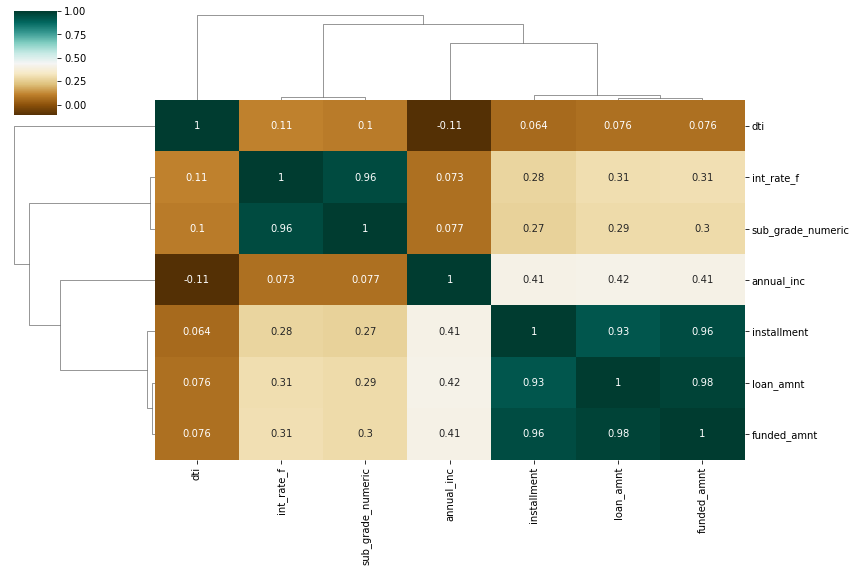

In [63]:
sns.clustermap(loan_data_corr,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

### Obeservations:
There is a strong corelation between 
1. sub_grade and interest rates 
2. loan amount and funded amount
hence we need only one from them.
3. we will keep intrest rates and loan amount 
4. There are many redundant columns. 

In [64]:
#Drop redundant columns 
clean_df.drop(columns=['member_id','funded_amnt_inv','grade','sub_grade','emp_title',
                        'issue_d','url','desc','int_rate','open_acc','revol_bal','total_acc',
                       'purpose','title','zip_code','out_prncp','out_prncp_inv','total_pymnt',
                       'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                       'recoveries','collection_recovery_fee','last_pymnt_amnt',
                        'last_credit_pull_d', 'last_credit_pull_dt','sub_grade_numeric',
                       'last_pymnt_d','verification_status','earliest_cr_line'],
                        axis=1,inplace=True)

In [65]:
#Let's understand our data after cleaning.
data_understand(clean_df)

(39316, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39316 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39316 non-null  int64         
 1   loan_amnt             39316 non-null  int64         
 2   funded_amnt           39316 non-null  int64         
 3   term                  39316 non-null  object        
 4   installment           39316 non-null  float64       
 5   emp_length            39316 non-null  object        
 6   home_ownership        39316 non-null  object        
 7   annual_inc            39316 non-null  float64       
 8   loan_status           39316 non-null  object        
 9   addr_state            39316 non-null  object        
 10  dti                   39316 non-null  float64       
 11  delinq_2yrs           39316 non-null  int64         
 12  inq_last_6mths        39316 non-null  int64         
 13  pub_

In [66]:
clean_df.sample(10)

,id,loan_amnt,funded_amnt,term,installment,emp_length,home_ownership,annual_inc,loan_status,addr_state,...,inq_last_6mths,pub_rec,revol_util,pub_rec_bankruptcies,issue_date_dt,int_rate_f,emp_title_provided,source_verification,income_verification,purpose_mapped
4186,1006618,15125,15125,60,347.95,8,rent,55000.0,fully paid,CA,...,2,0,73.60%,0.0,2011-11-01,13.49,Disclosed,False,False,debt_consolidation
33397,468826,1000,1000,36,31.62,3,own,54870.0,fully paid,IL,...,5,0,2.80%,0.0,2009-12-01,8.59,Disclosed,False,False,home_improvement
25244,586568,12000,12000,36,424.56,2,mortgage,30000.0,fully paid,MD,...,1,0,67.40%,0.0,2010-09-01,16.45,Disclosed,True,True,debt_consolidation
29805,517982,7000,7000,36,218.97,1,rent,18000.0,fully paid,MA,...,0,0,27.80%,0.0,2010-05-01,7.88,Disclosed,False,True,other
2737,1032430,28000,28000,60,720.81,0,rent,129000.0,fully paid,MA,...,0,0,78.30%,0.0,2011-12-01,18.64,Disclosed,False,True,debt_consolidation
19911,666999,1200,1200,36,37.22,10,mortgage,40800.0,fully paid,MN,...,0,0,15.20%,0.0,2011-02-01,7.29,Disclosed,False,False,debt_consolidation
20905,651423,3000,3000,36,90.99,10,rent,120390.0,fully paid,MD,...,1,0,60.30%,0.0,2011-01-01,5.79,Disclosed,False,True,major_purchase
23901,594100,5000,5000,36,154.18,3,mortgage,30000.0,fully paid,CA,...,1,0,15.80%,0.0,2010-11-01,6.91,Disclosed,False,False,debt_consolidation
30209,512005,7000,7000,36,218.97,0,rent,60000.0,fully paid,CA,...,0,0,39%,0.0,2010-05-01,7.88,Disclosed,False,True,debt_consolidation
7329,858300,23000,23000,60,587.19,10,rent,75000.0,fully paid,NY,...,0,0,13.20%,0.0,2011-09-01,18.25,Disclosed,False,True,debt_consolidation


In [67]:
clean_df.groupby(by=['home_ownership','loan_status'])['id'].count().reset_index()

,home_ownership,loan_status,id
0,mortgage,charged off,2302
1,mortgage,current,628
2,mortgage,fully paid,14448
3,other,charged off,18
4,other,fully paid,78
5,own,charged off,440
6,own,current,82
7,own,fully paid,2507
8,rent,charged off,2824
9,rent,current,416


In [68]:
print(clean_df.groupby(by=['loan_status'])['int_rate_f'].mean())

loan_status
charged off    13.808626
current        15.000861
fully paid     11.594340
Name: int_rate_f, dtype: float64


In [69]:
print(clean_df.groupby(by=['loan_status'])['loan_amnt'].mean())

loan_status
charged off    12042.814291
current        16958.126110
fully paid     10777.879071
Name: loan_amnt, dtype: float64


In [70]:
#Let's understand if we have still Null Values 
null_check(clean_df)

Total and Percentage of NaN:
             Total  Percent
revol_util     49     0.12


### we will concentrate on 2 key segments 'fully paid' and 'charge off'.
we will use following common functions

In [71]:
# Current is very small number and we will ignore 
segmented_df  = clean_df[clean_df['loan_status']!='current']

In [72]:
def count_plot(df, analyzecol, des, fig=3):
    plt.figure(figsize=[6.0,fig],dpi=120,frameon=True)
    sns.countplot(y=df[analyzecol], data= df, order=df[analyzecol].value_counts().index)
    plt.xlabel("Count")
    plt.title(des) 
    plt.show()
    

In [73]:
def plot_graph(df, analyzecol, des, type):
    plt.figure(figsize=[6.0,3.0],dpi=120,frameon=True)
    sns.catplot(y = analyzecol, x="loan_status", hue="loan_status", kind=type, data=df) #    plt.xlabel("Loan Amount")
    plt.title(des) 
    plt.show()

In [74]:
#function return pivot table
def pivot_ana(df,ind,col):
    pivot_table= pd.pivot_table(df, values='id', index = ind,
                              columns= col, 
                            aggfunc='count', dropna=False,  fill_value=0)
    return pivot_table

In [75]:

def stack_plot(df,x,title):
    table =pivot_ana(df,x,'loan_status')
    table['percent_Charged_Off']=(table['charged off']/(table['charged off']+table['fully paid']))*100
    table['percent_fully_Paid']=(table['fully paid']/(table['charged off']+table['fully paid']))*100
    #creating new Dataframe
    table=table.drop(['charged off','fully paid'], axis = 1)
    if(x=='addr_state'):
        size=(18,8)
    else:
         size=(6,6)
    table.plot(kind='bar',stacked=True,figsize=size) # color=["red","green"],
    plt.title(title,fontsize=20,color="black")
    plt.xlabel(x)
    plt.ylabel('loan_status')
    

In [76]:
def bar_plot(df, xcol, ycol, des,figx=6.0, figy=5.0):
    plt.figure(figsize=[figx,figy],dpi=120,frameon=True)
    sns.barplot(x = xcol, y = ycol, hue='loan_status', data= df)#, palette=palette)
    #plt.ylabel("Number of Investments")
    #plt.xlabel("Top 3 Countries and 3 Sectors")
    plt.title(des) 
    plt.show()   

### Analyze Applied Loan Amount 

In [77]:
#define labels for loan amount
lable = ['0k, 5k','5k, 10k','10k, 15k','15k, 20k','20k, 25k','25k, 30k','30k, 35k']
#Binning loan_amnt data
segmented_df['loan_amnt_bin_catlg'] = pd.cut(segmented_df['loan_amnt'], bins=[0, 5000.0 ,10000.0,15000.0,20000.0,25000.0,30000.0,35000.0],labels= lable) # ['0.0, 5000.0','5000.0, 10000.0','10000.0, 15000.0','15000.0, 20000.0','20000.0, 25000.0','25000.0, 30000.0','30000.0, 35000.0'])


<Figure size 720x360 with 0 Axes>

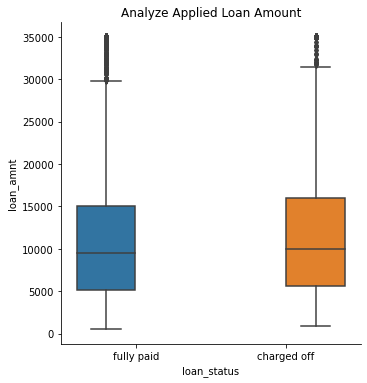

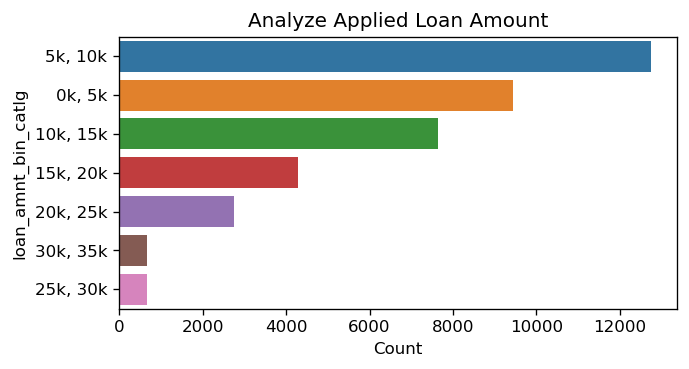

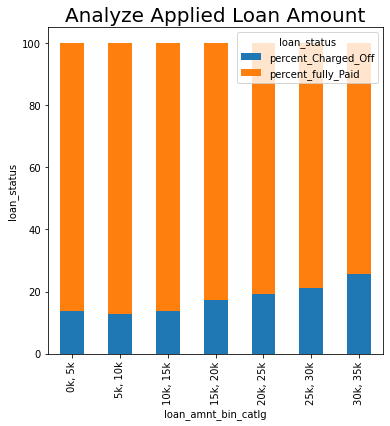

In [78]:
#Plotting box plot for loan_status vs loan_amnt
plot_graph(segmented_df, 'loan_amnt',"Analyze Applied Loan Amount", 'box')
#Plotting count plot for loan_status vs loan_amnt
count_plot(segmented_df, 'loan_amnt_bin_catlg',"Analyze Applied Loan Amount")
# plotting % of loan_status vs loan_amnt
stack_plot(segmented_df, 'loan_amnt_bin_catlg',"Analyze Applied Loan Amount")


### Observation : Higher the Applied Loan Amount, higher the percentage of Charged off.
The Maxmimum Loan Applied cases are in 3 Loan ranges are 5K-10K, 0k-5K, 10k to 15K and lowest in 30K to 35K, however the Charge off percentage is higher in $30K to #35k.

### Analyse Funded Amount

In [79]:
#define labels and bins for funded amount
bin = [0, 5000.0 ,10000.0,15000.0,20000.0,25000.0,30000.0,35000.0]
lable = ['0k, 5k','5k, 10k','10k, 15k','15k, 20k','20k, 25k','25k, 30k','30k, 35k']

#Binning funded amont data
segmented_df['funded_amnt_bin_catlg'] = pd.cut(segmented_df['funded_amnt'], bins=bin,labels= lable)

<Figure size 720x360 with 0 Axes>

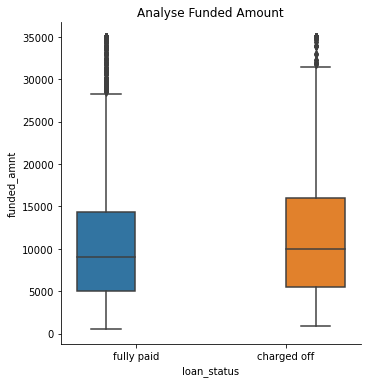

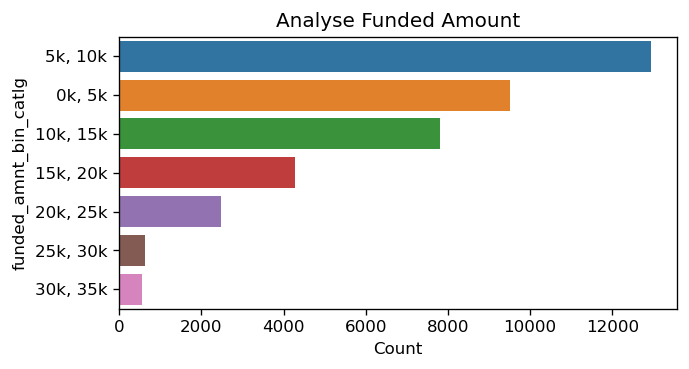

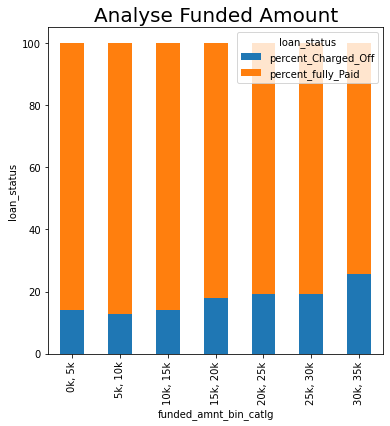

In [80]:
#Plotting box plot for loan_status vs funded_amnt
plot_graph(segmented_df, 'funded_amnt',"Analyse Funded Amount", 'box')
#Plotting count plot for loan_status vs funded_amnt
count_plot(segmented_df, 'funded_amnt_bin_catlg',"Analyse Funded Amount")
# plotting % of loan_status vs funded_amnt
stack_plot(segmented_df, 'funded_amnt_bin_catlg',"Analyse Funded Amount")

### Observation : Higher the Funded Amount of the Loan higher the percentage of Charged off.
Funded Amount and Loan Amount columns are highly Co-related

### Analyse Funded Amount v/s Applied Loan Amount 

In [81]:
# Create a flag to indicate if the funded amount is same as Applicant requested Amount
segmented_df['full_amnt_given'] = np.where(segmented_df['loan_amnt'] == segmented_df['funded_amnt'], True, False)
segmented_df['full_amnt_given'] = segmented_df['full_amnt_given'].apply(lambda x:'Full Amount' if x is True else 'Reduced Amount')

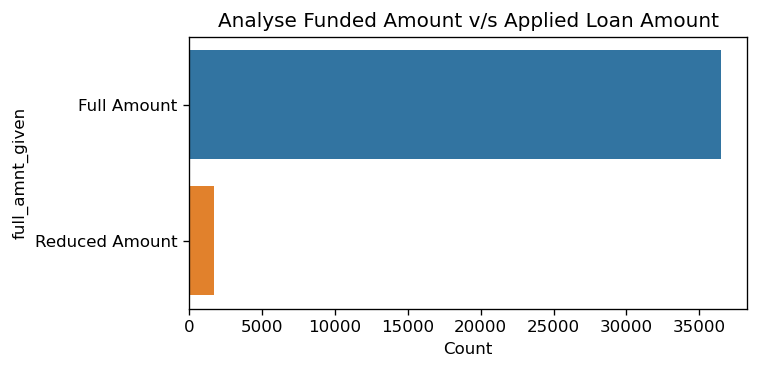

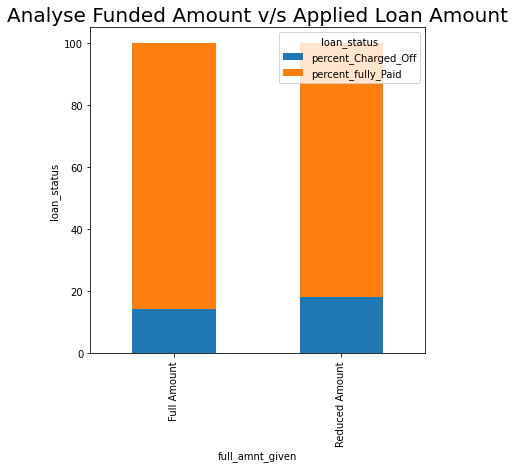

In [82]:
#Plotting count plot for Funded Amount vs loan_amnt
count_plot(segmented_df, 'full_amnt_given', "Analyse Funded Amount v/s Applied Loan Amount")
# plotting % of loan_status vs loan_amnt
stack_plot(segmented_df, 'full_amnt_given', "Analyse Funded Amount v/s Applied Loan Amount")

### Observation
higher chances of charge offs when the reduced amount is funded.

## Analyze Tenure of the loan 

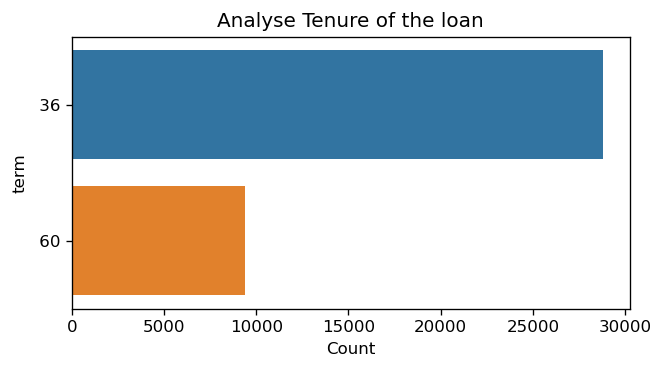

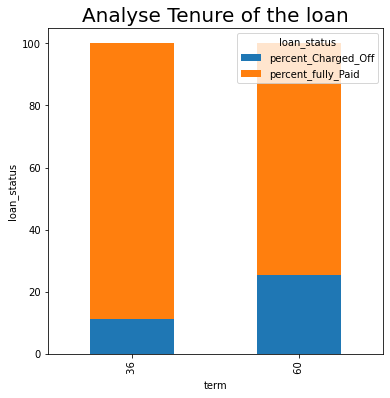

In [83]:
# plotting count plot for term
count_plot(segmented_df, 'term', "Analyse Tenure of the loan")
# plotting % of loan_status vs term
stack_plot(segmented_df, 'term', "Analyse Tenure of the loan")

### Observation : Higher the Tenure of the Loan higher the percentage of Charged off.
Higher Tenure results into higher percentage of Charge Off. 

### Analyse Interest rate of the Loan

<Figure size 720x360 with 0 Axes>

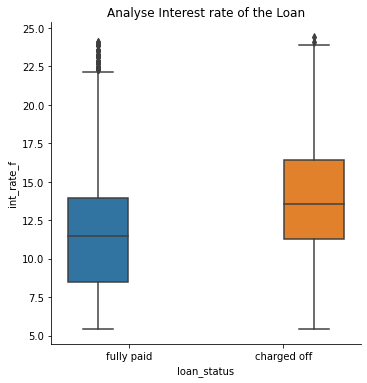

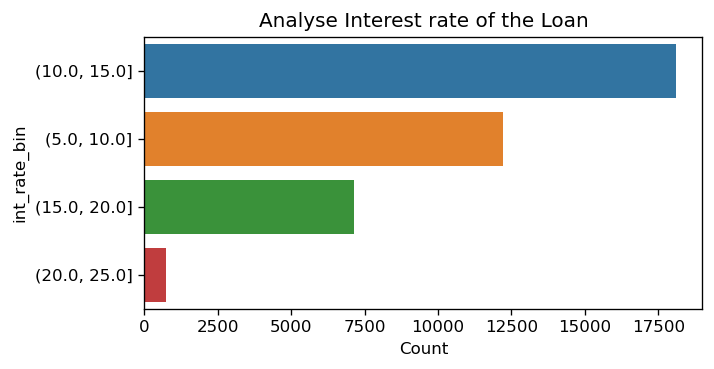

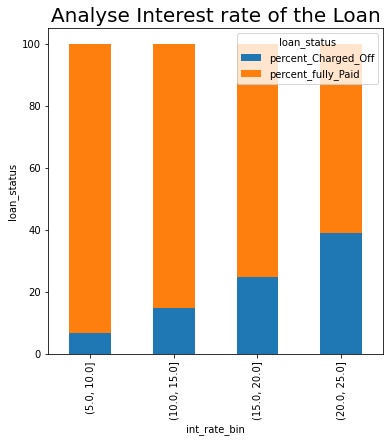

In [84]:
# plotting box plot intrest rest vs loan status
plot_graph(segmented_df, 'int_rate_f',"Analyse Interest rate of the Loan", 'box')
segmented_df['int_rate_bin'] = pd.cut(segmented_df['int_rate_f'], np.linspace(5, 25, 5))
# plotting count plot for rate of the Loan
count_plot(segmented_df, 'int_rate_bin', "Analyse Interest rate of the Loan")
# stack plot for % of loan_status  vs rate of the Loan
stack_plot(segmented_df, 'int_rate_bin', "Analyse Interest rate of the Loan")

### Observation : Higher the Interst rate higher the percentage of Charged off.
With increse in interest rate is, the percentage of Charged off Loans increases. 
Even though Highest number of Loans are with 10 -15 % interest rates, 

### Analyze Dti - Debit to Income Ratio

In [85]:
#segmenting df to analyse the parameter
segmented_df['dti_bin']=pd.cut(segmented_df['dti'], np.linspace(0, 30, 7))

<Figure size 720x360 with 0 Axes>

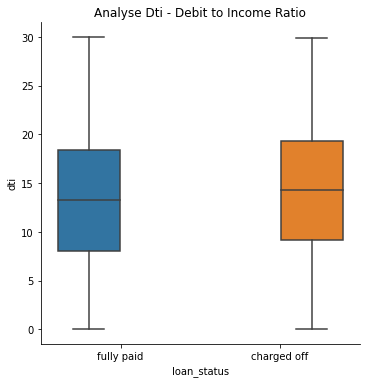

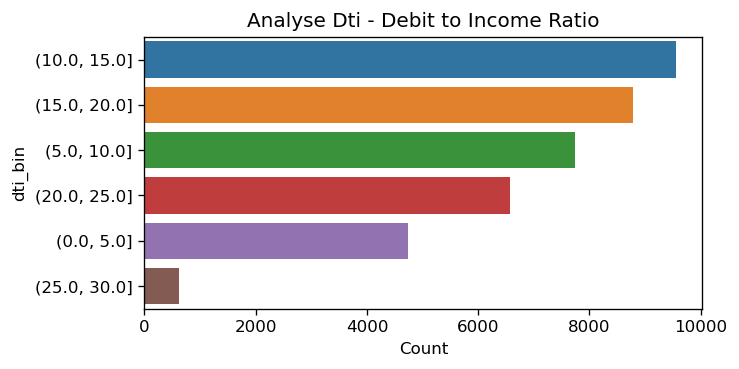

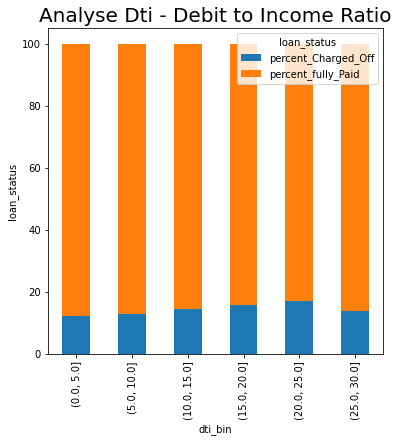

In [86]:
#plotting box plot dti vs loan_status
plot_graph(segmented_df, 'dti',"Analyse Dti - Debit to Income Ratio", 'box')
#plotting count plot for dti 
count_plot(segmented_df, 'dti_bin', "Analyse Dti - Debit to Income Ratio")
#plotting DTI vs % of loan_status
stack_plot(segmented_df, 'dti_bin', "Analyse Dti - Debit to Income Ratio")

### Observation : Higher the Debit to Income ratio higher the percentage of Charged off.
Also, from box plot, it is evident,that dti is higher in charged off loans.
The percentage of charged off loans is increasing as the dti increases.
Maximum Loans are in  dti 10-15 range.


### Analyse Home Ownership Status 

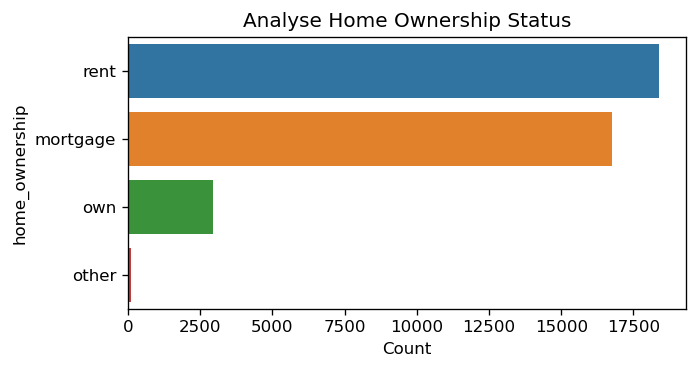

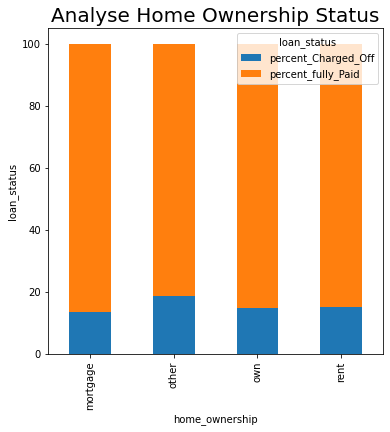

In [87]:
# Plotting count plot for Home Ownership Status
count_plot(segmented_df, 'home_ownership', "Analyse Home Ownership Status")
# Plotting plot for Home Ownership Status vs percent of loan status
stack_plot(segmented_df, 'home_ownership', "Analyse Home Ownership Status")

### Observation : "Other" Home ownership has higher percentage of Charged off.
"Own" Home Category has lower risk of Charge off.

### Analyse Annual Income

In [88]:
#binning the annual income column for analysis
bin=[0, 20000, 40000, 60000, 80000,1000000]
label=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +']
segmented_df['annual_inc_bin'] = pd.cut(clean_df['annual_inc'], bins=bin,labels=label)

<Figure size 720x360 with 0 Axes>

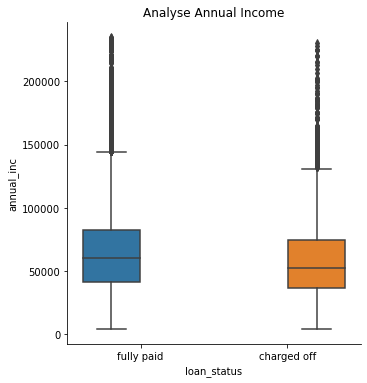

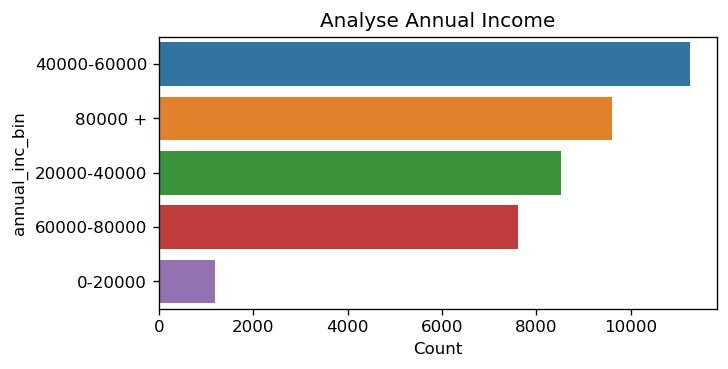

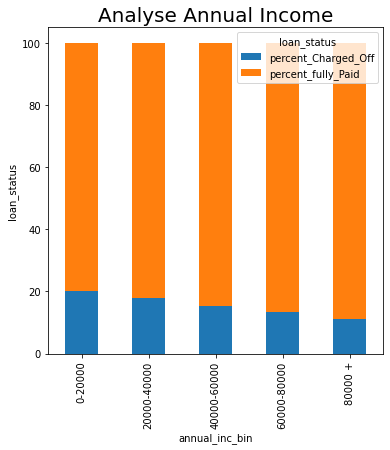

In [89]:
#Plotting box plot for Annual Income vs loan_status
plot_graph(segmented_df, 'annual_inc',"Analyse Annual Income", 'box')
count_plot(segmented_df, 'annual_inc_bin',"Analyse Annual Income")
stack_plot(segmented_df, 'annual_inc_bin',"Analyse Annual Income")

### Observation: Charge offs decreases with increase in Income.

### Analyse Year of Issue 

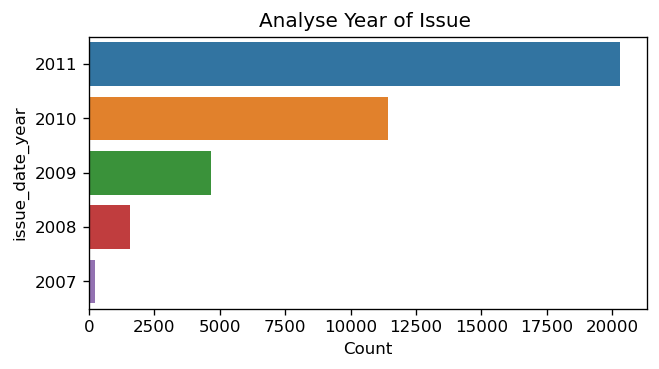

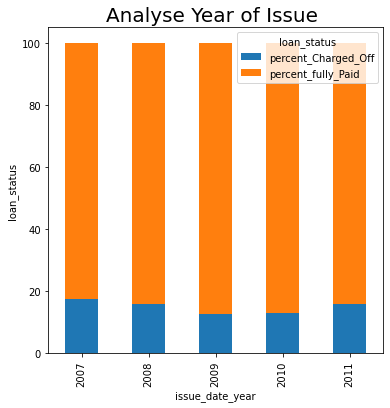

In [90]:
segmented_df['issue_date_year']=segmented_df['issue_date_dt'].dt.year
segmented_df['issue_date_year']=segmented_df['issue_date_year'].astype(str)

count_plot(segmented_df, 'issue_date_year',"Analyse Year of Issue ")
stack_plot(segmented_df, 'issue_date_year',"Analyse Year of Issue ")


### Obeservation : Percentage charged off loans have reduced from 2007 to 2010
Eventhough number of loans has incresed from 2007 to 2011.


### Analyse Number of derogatory comments on the credit file (pub_rec)

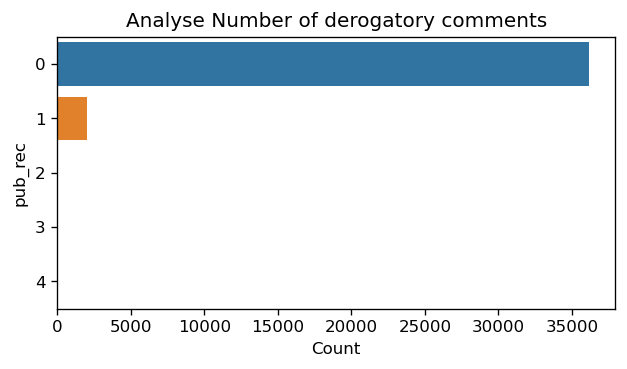

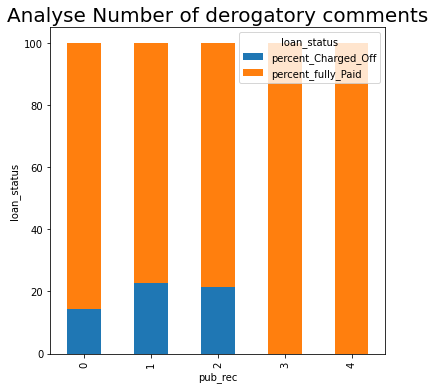

In [91]:
segmented_df.pub_rec = segmented_df.pub_rec.astype(str)
count_plot(segmented_df, 'pub_rec',"Analyse Number of derogatory comments")
stack_plot(segmented_df, 'pub_rec',"Analyse Number of derogatory comments")

### Observation : Higher the derogatory comments are, the higher is the charge off rate.

### Analyse Number of public bankruptcies on the credit file (pub_rec_bankruptcies)

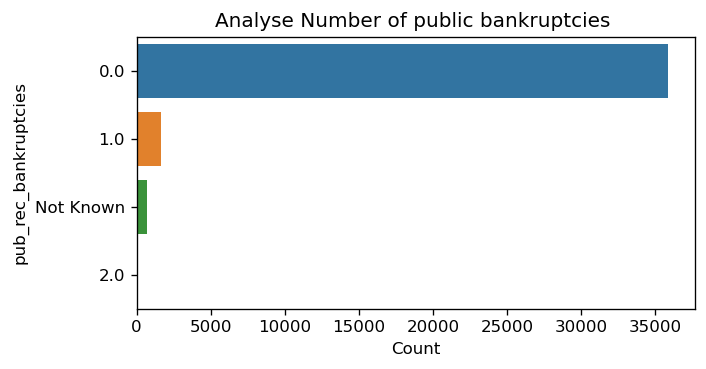

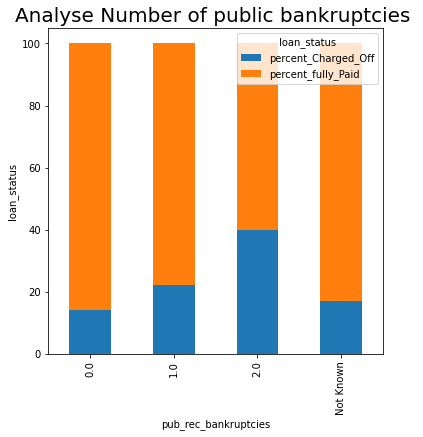

In [92]:
count_plot(segmented_df, 'pub_rec_bankruptcies',"Analyse Number of public bankruptcies ")
stack_plot(segmented_df, 'pub_rec_bankruptcies',"Analyse Number of public bankruptcies ")

### Observation : The charge off rate is increasing with increse in Bankruptices

### Analyse Source Verification

<Figure size 720x360 with 0 Axes>

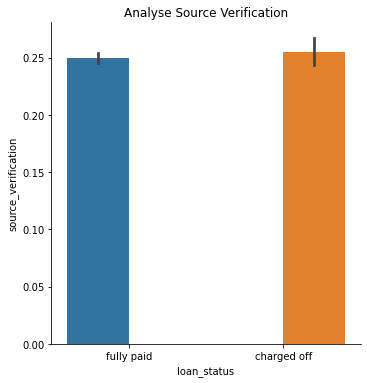

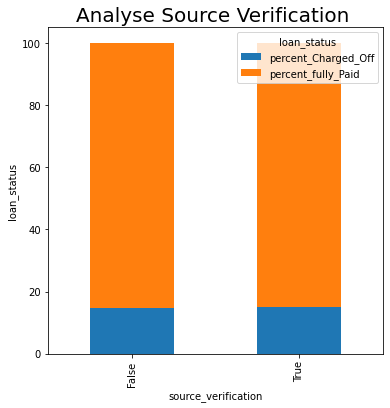

In [93]:
plot_graph(segmented_df, 'source_verification',"Analyse Source Verification", 'bar')
stack_plot(segmented_df, 'source_verification',"Analyse Source Verification ")

### Analyse Income Verification

<Figure size 720x360 with 0 Axes>

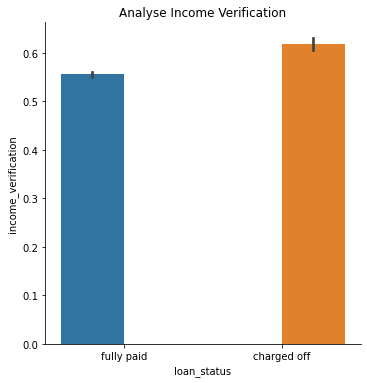

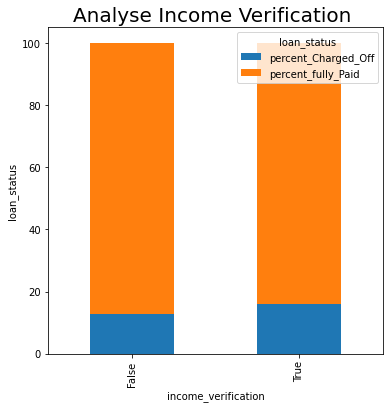

In [94]:
plot_graph(segmented_df, 'income_verification',"Analyse Income Verification", 'bar')
stack_plot(segmented_df, 'income_verification',"Analyse Income Verification ")


### Observations: Charge off rate is higher, If Income is Verified  

### Analyse Purpose mentioned by customer on the application

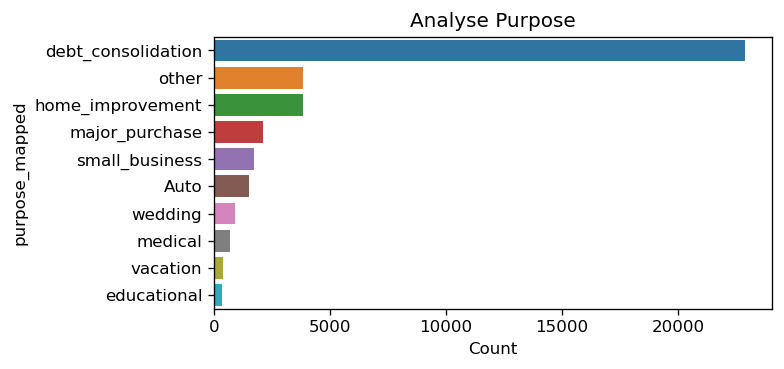

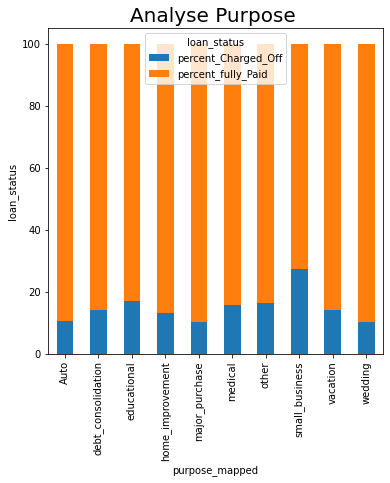

In [95]:
count_plot(segmented_df, 'purpose_mapped',"Analyse Purpose")
stack_plot(segmented_df, 'purpose_mapped',"Analyse Purpose ")


### Observation : Small Business and Educational loans are highly charged off.
Maxmium people have opted for Debit Consolidation type of loan

### Analyse the employee title diclosure

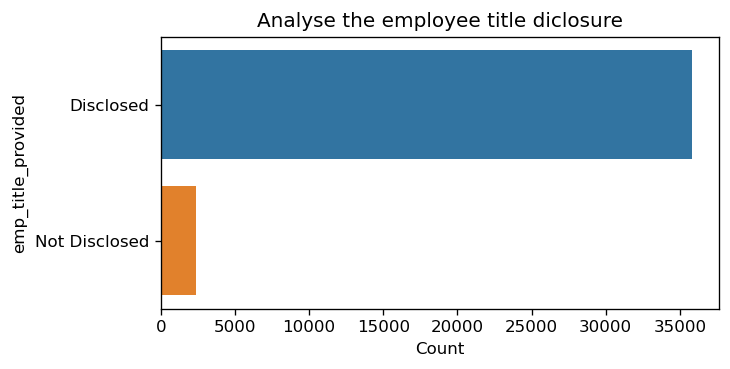

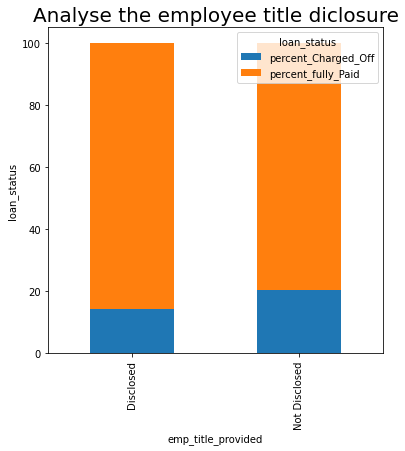

In [96]:
count_plot(segmented_df, 'emp_title_provided',"Analyse the employee title diclosure")
stack_plot(segmented_df, 'emp_title_provided',"Analyse the employee title diclosure")

### Observation : If the Employee Title is not disclosed then charged off percentage is higher
However, the 'Not Disclosed' is much less compared to 'Disclosed' category and that could have some bearing on this trend.
Maximum number of people have Disclosed their Employee Title.

### Analyse the Employment Length

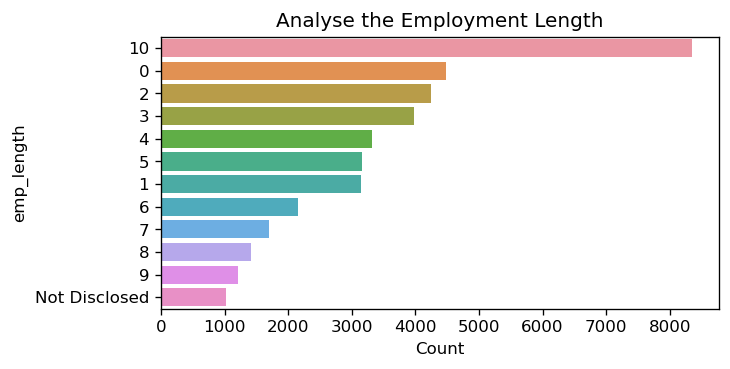

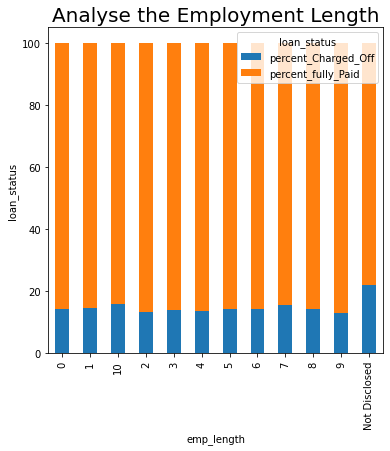

In [97]:
segmented_df.emp_length = segmented_df.emp_length.astype(str)
count_plot(segmented_df, 'emp_length',"Analyse the Employment Length")
stack_plot(segmented_df, 'emp_length',"Analyse the Employment Length")

### Observation : If employment length is not disclosed then Charge Off rate is higher



### Analyse Installment Amount

In [98]:
segmented_df['installment_bin'] = pd.cut(np.log2(segmented_df['installment']), np.linspace(3.5, 10.5, 8))

<Figure size 720x360 with 0 Axes>

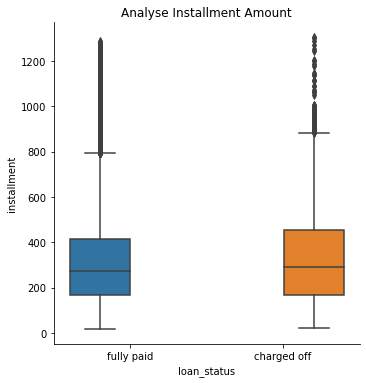

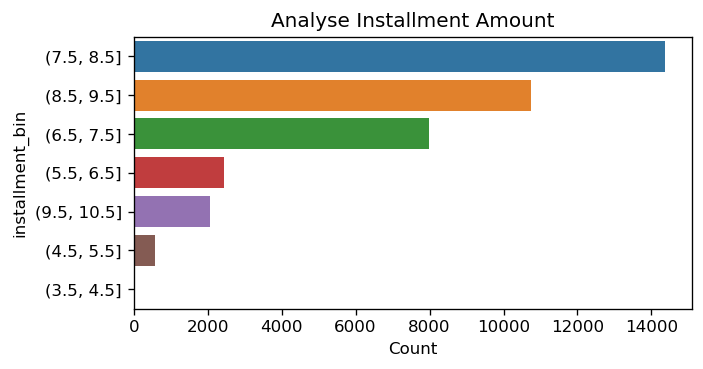

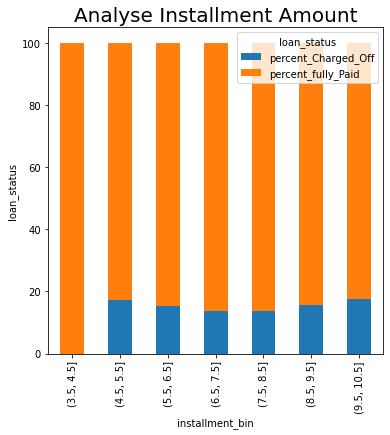

In [99]:
plot_graph(segmented_df, 'installment',"Analyse Installment Amount", 'box')
count_plot(segmented_df, 'installment_bin',"Analyse Installment Amount")
stack_plot(segmented_df, 'installment_bin',"Analyse Installment Amount")

### Observation: As Installament Amount increses, the Charge off rate also increses. 
Most of the Loans fall under 7.5 to 8.5 Installament Category, followed with 8.5 to 9.5 and 6.5 to 7.5

In [100]:
replace_cln(segmented_df, 'revol_util', '%', '' )
segmented_df['revol_util']= segmented_df['revol_util'].astype('float')
segmented_df.revol_util.dtype

dtype('float64')

### Analyse Revolving Balance Utilization Rate

In [101]:
segmented_df['revol_util_bin'] = pd.cut(segmented_df['revol_util'], np.linspace(0, 100, 11))

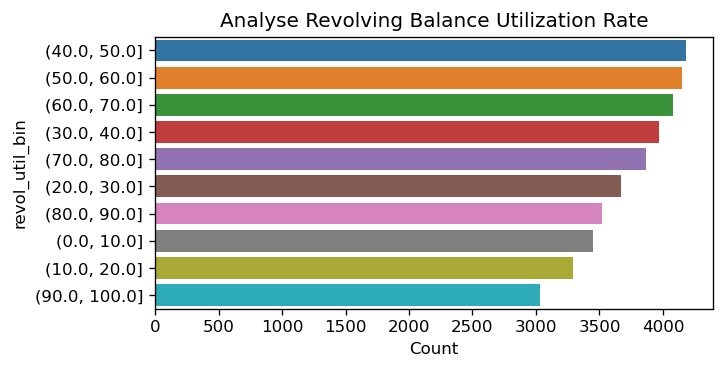

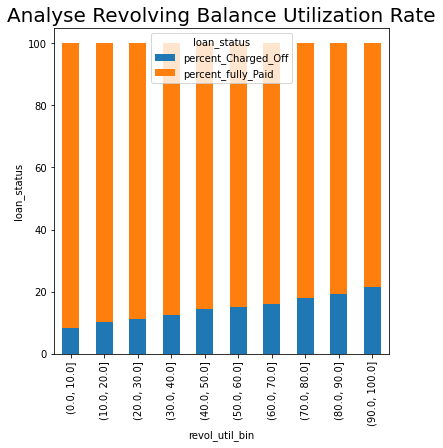

In [102]:
count_plot(segmented_df, 'revol_util_bin',"Analyse Revolving Balance Utilization Rate")
stack_plot(segmented_df, 'revol_util_bin',"Analyse Revolving Balance Utilization Rate")

### Observations: With increase in revolving balance utilization charge off rate is increasing 

### Analyse State of Applicant

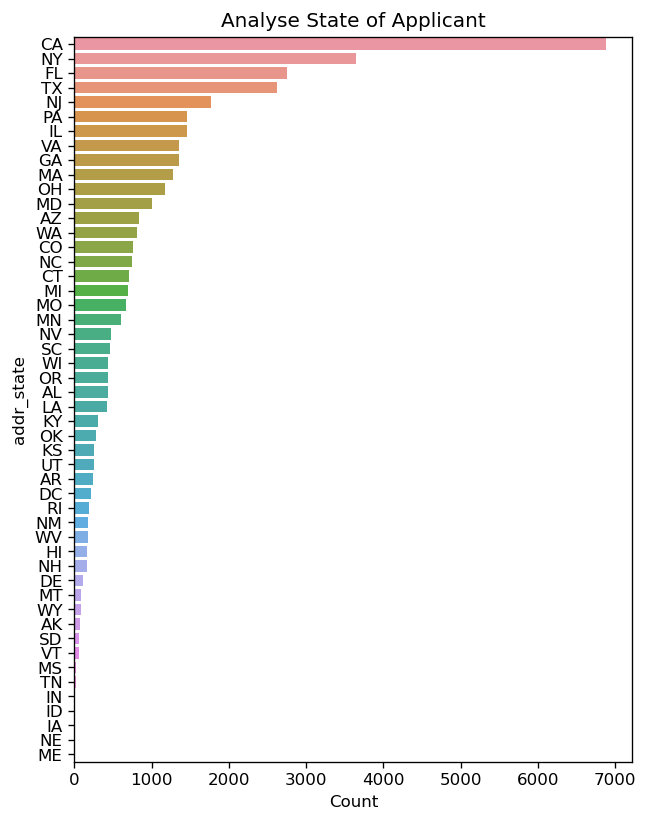

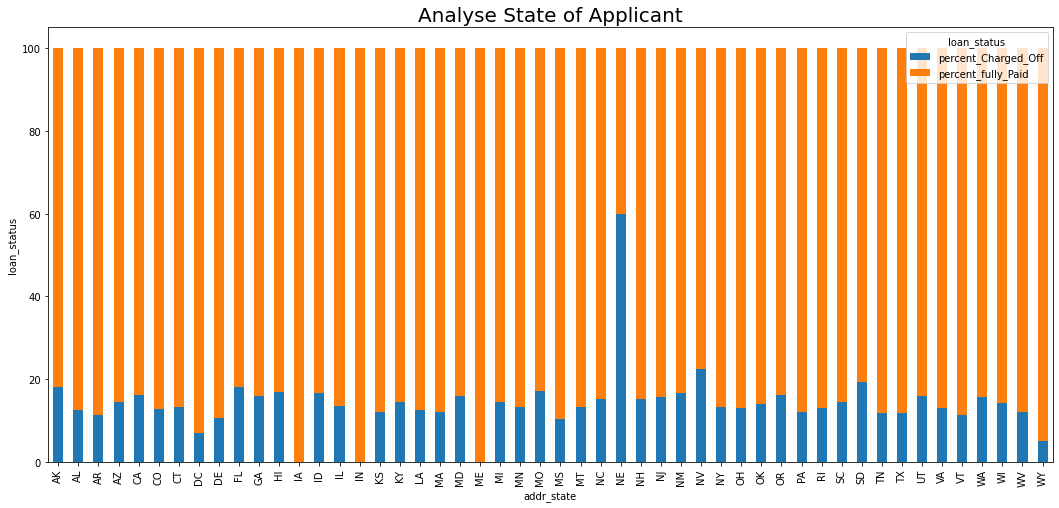

In [103]:
count_plot(segmented_df, 'addr_state',"Analyse State of Applicant", fig=8.0)
stack_plot(segmented_df, 'addr_state',"Analyse State of Applicant")

### Observation : Eventhough CA highest number of Loans as well as Charged Off rate, however percentage of Charge offs are higher in NE, NIU, AE 


### Analyse delinq_2yrs

In [104]:
segmented_df.delinq_2yrs = segmented_df.delinq_2yrs.astype(str)

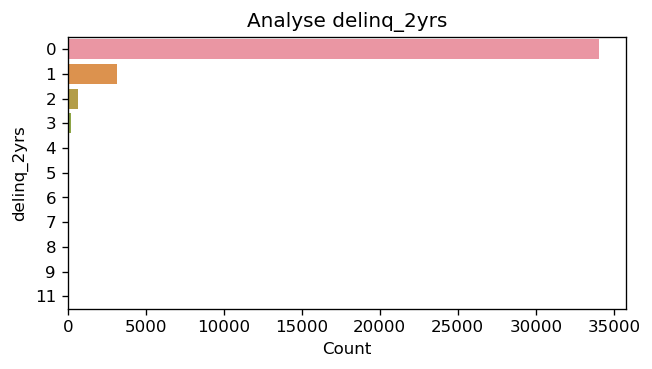

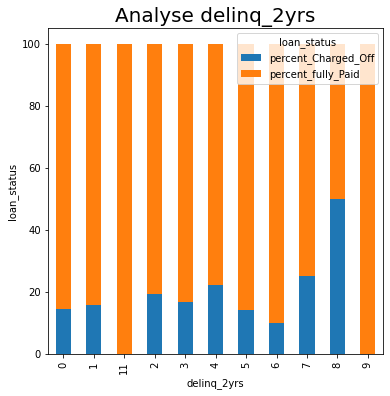

In [105]:
count_plot(segmented_df, 'delinq_2yrs',"Analyse delinq_2yrs")
stack_plot(segmented_df, 'delinq_2yrs',"Analyse delinq_2yrs")

### Observation: As the delinq_2yrsincreases, the percentage of charged off loans increases.

### Bivariate Analysis

### Analyse the DTI ratio and Verification Status

In [106]:
charge_off = segmented_df[segmented_df['loan_status']=='charged off']
fully_paid = segmented_df[segmented_df['loan_status']=='fully_paid']

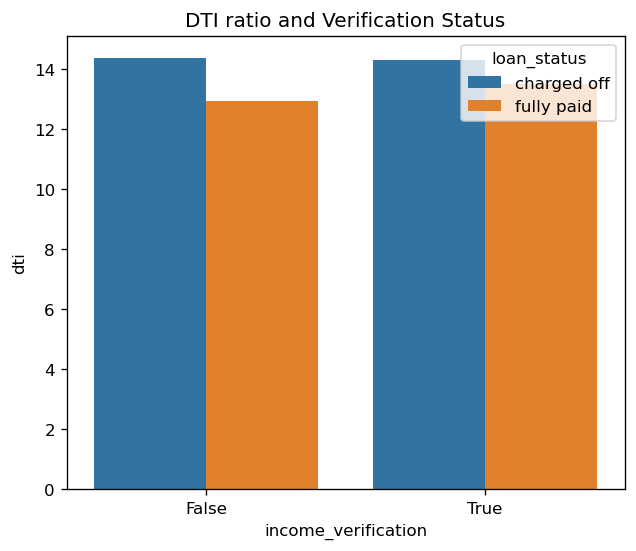

In [107]:
df = segmented_df.groupby(by=['income_verification','loan_status'])['dti'].median().reset_index()
bar_plot(df, 'income_verification', 'dti', 'DTI ratio and Verification Status') #,figx=6.0, figy=3.0)

### Observation: Income Verfication has very limited influence on Charge Off and hence Income Verfication should be improved


### Check how the average DTI acorss the states

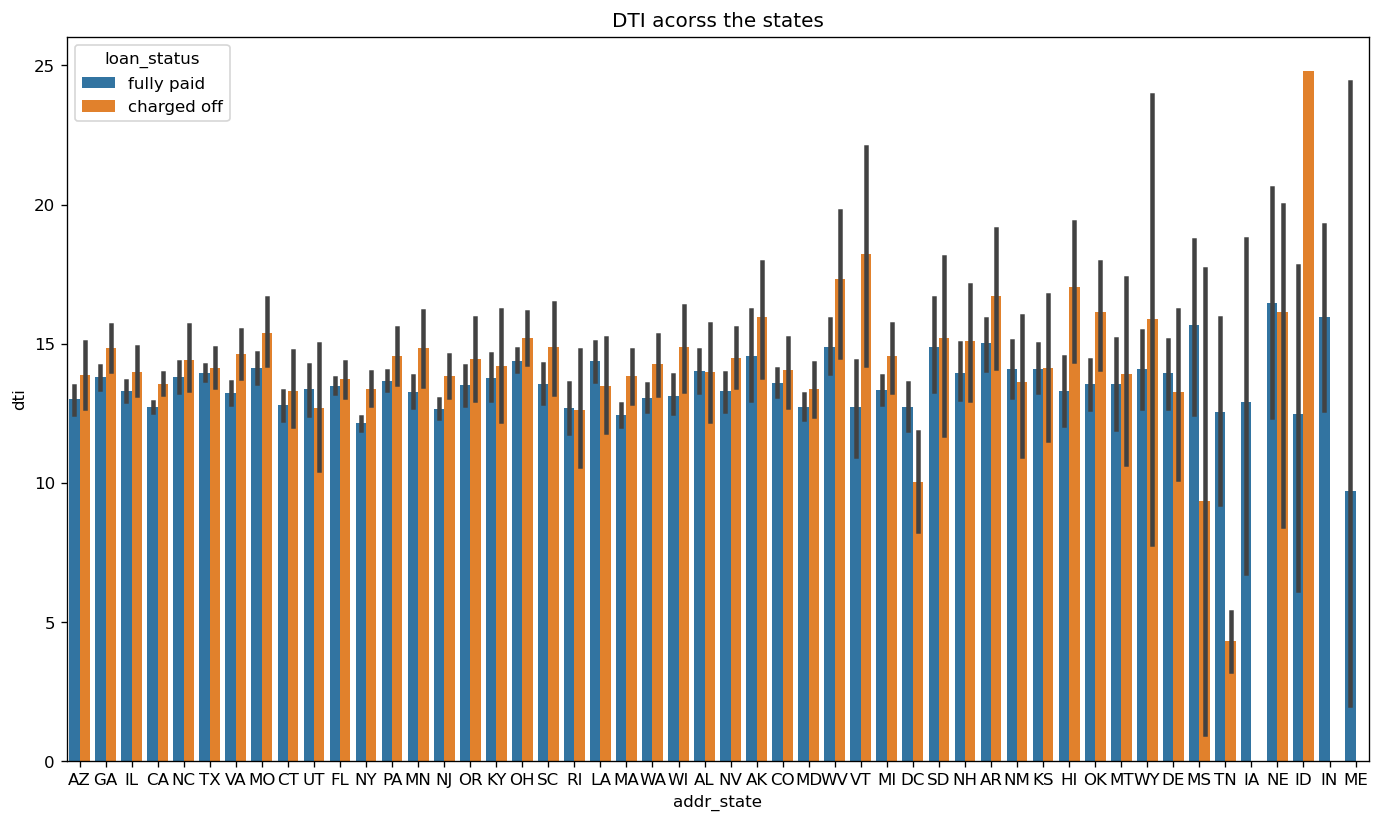

In [108]:
bar_plot(segmented_df, 'addr_state', 'dti', 'DTI acorss the states', 14.0,8.0) #,figx=6.0, figy=3.0)

### Observation : The Debit to Income ratio is almost similar across states.
It's higher in 'NE' and hence highest percentage of chanrged off loans.
It's is minimal in NV.

### Analyse the relation between loan status, home ownership and dti.###

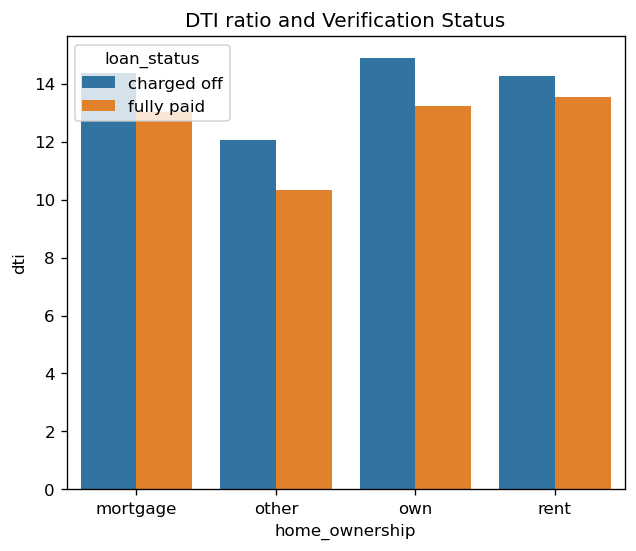

In [109]:
df = segmented_df.groupby(by=['home_ownership','loan_status'])['dti'].median().reset_index()
bar_plot(df, 'home_ownership', 'dti', 'DTI ratio and Verification Status') #,figx=6.0, figy=3.0)

### Observation: percentage of defaulting loan is higher in the below mentioned scenario.
1. If the DTI is higher 
2. The home ownership is 'own' 

In [110]:
#function for byvariate analysis
def bivariate_ana(df1, df2, ind1, ind2, col1, col2):
    charged_off = pivot_ana(df1,ind1,col1)    
    total = pivot_ana(df2,ind2,col2)
    charged_off_total_ratio = (charged_off / total * 100)
    charged_off_total_ratio.sort_index()
    charged_off_total_ratio.plot(kind='bar', figsize=(10,10), color=['green','aquamarine','magenta','cyan','orange','yellow'])
    plt.ylabel('Charge off %')

###  Annual income and interest rate impact on the Charged off loans

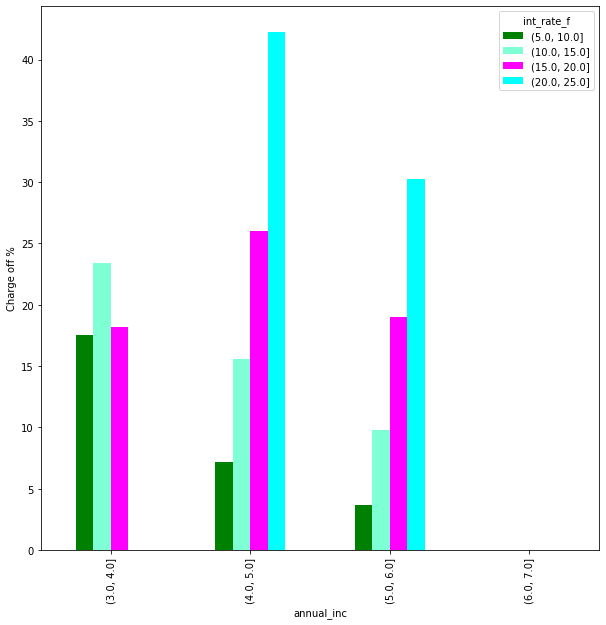

In [111]:
bivariate_ana(df1=charge_off,df2=segmented_df, 
              ind1=[pd.cut(np.log10(charge_off['annual_inc']), np.linspace(3, 7, 5))], 
              ind2=[pd.cut(np.log10(segmented_df['annual_inc']), np.linspace(3, 7, 5))], 
              col1=[pd.cut(charge_off['int_rate_f'], np.linspace(5, 25, 5))],
              col2=[pd.cut(segmented_df['int_rate_f'], np.linspace(5, 25, 5))])

### Observation : 

If interest rate is same then, charge off rate decreases with increase in annual income

If income is same then, charge off increases with increase in interest rate

### Analyse the effect of DTI and Interest Rates vs Loan status

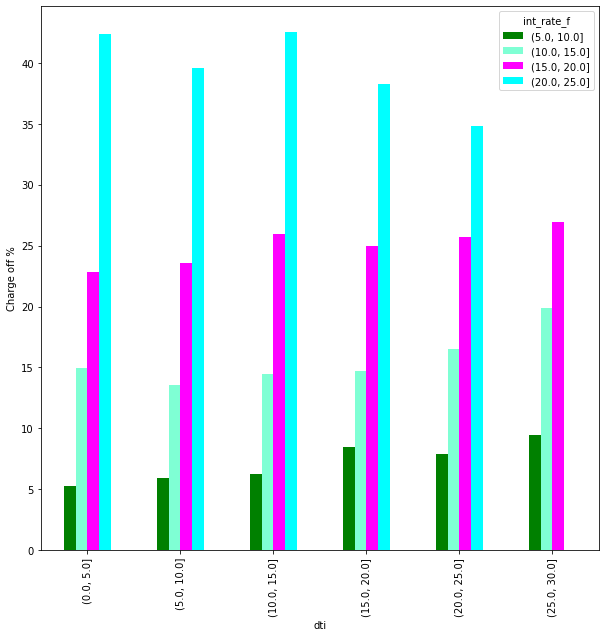

In [112]:
bivariate_ana(df1=charge_off,df2=segmented_df, 
              ind1=[pd.cut(charge_off['dti'], np.linspace(0, 30, 7))], 
              ind2=[pd.cut(segmented_df['dti'], np.linspace(0, 30, 7))], 
              col1=[pd.cut(charge_off['int_rate_f'], np.linspace(5, 25, 5))],
              col2=[pd.cut(segmented_df['int_rate_f'], np.linspace(5, 25, 5))])

### Observation
If dti is same then, higher interest rates result in more charge-offs
Higher interest rates have significant impact on charge offs

### Annual income and DTI

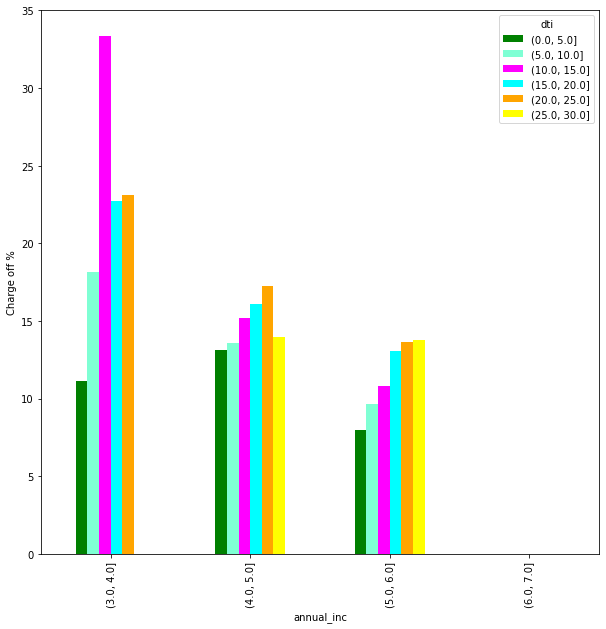

In [113]:
bivariate_ana(df1=charge_off,df2=segmented_df, 
              ind1=[pd.cut(np.log10(charge_off['annual_inc']), np.linspace(3, 7, 5))], 
              ind2=[pd.cut(np.log10(segmented_df['annual_inc']), np.linspace(3, 7, 5))], 
              col1=[pd.cut(charge_off['dti'], np.linspace(0, 30, 7))],
              col2=[pd.cut(segmented_df['dti'], np.linspace(0, 30, 7))])

### Observation : 
If income is same then, charge off increases with increase in DTI
If income is same then, charge off decreses with increase in salary



### Analyse the Relationship of Term, purpose and Income Verification vs loan status

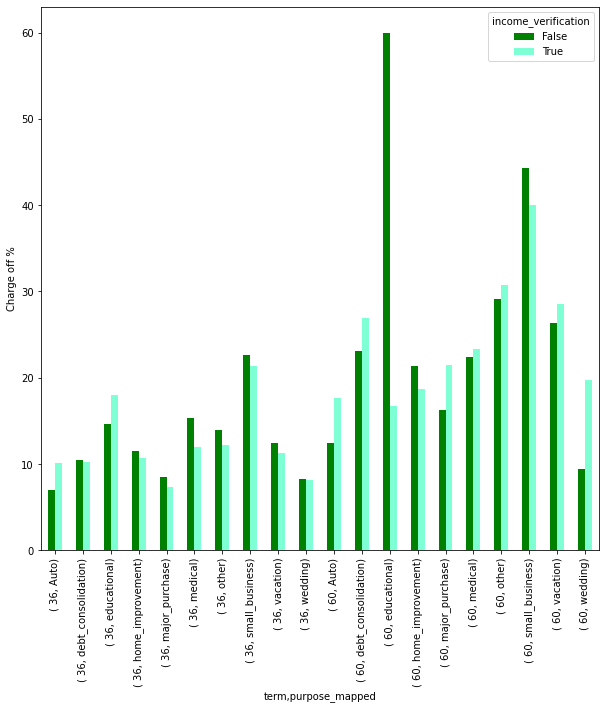

In [114]:
ind = ['term','purpose_mapped']
col = ['income_verification']

bivariate_ana(df1=charge_off,df2=segmented_df, ind1=ind, col1=col,ind2=ind, col2=col)

### Observation : Highest Charge off % in the following scenario
1. When income is not verified and Purpose is educational and Term is 60 Months


### Analyse the Relationship of Term, purpose and home_ownership vs loan status

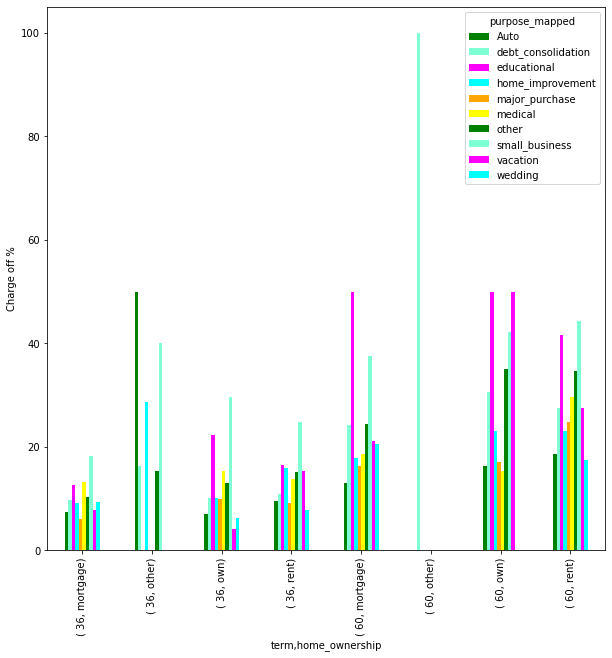

In [115]:
ind = ['term','home_ownership']
col = ['purpose_mapped']

bivariate_ana(df1=charge_off,df2=segmented_df, ind1=ind, col1=col,ind2=ind, col2=col)

### Observation: Highest Charge Offs % in the following scenario
Purpose is Debt Consolidation and Term is 60 Months and Home ownership is Other

### Analyse of Term, Home ownership, Income verification v/s Loan Status 

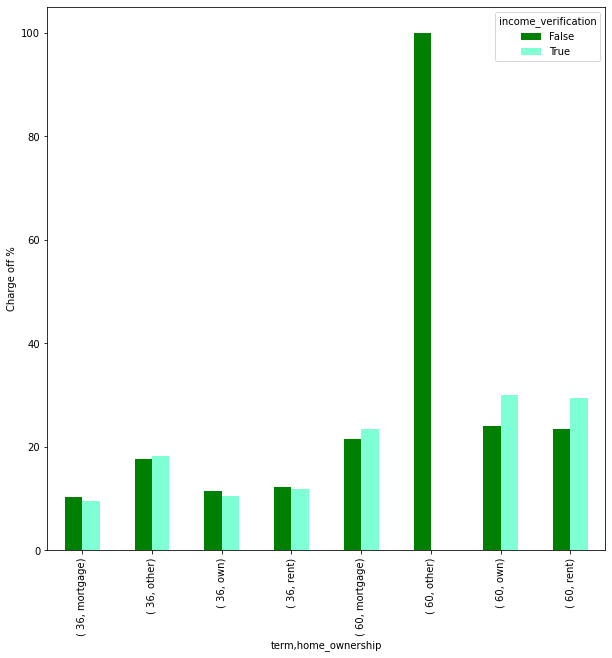

In [116]:
ind = ['term','home_ownership']
col = ['income_verification']

bivariate_ana(df1=charge_off,df2=segmented_df, ind1=ind, col1=col,ind2=ind, col2=col)

### Observation: Charge offs % is highest for the below mentioned scenario.
Term is 60 and Home ownership is other and income verification

### Analyse of Term, purpose, Home ownership, Income verification v/s Loan Status

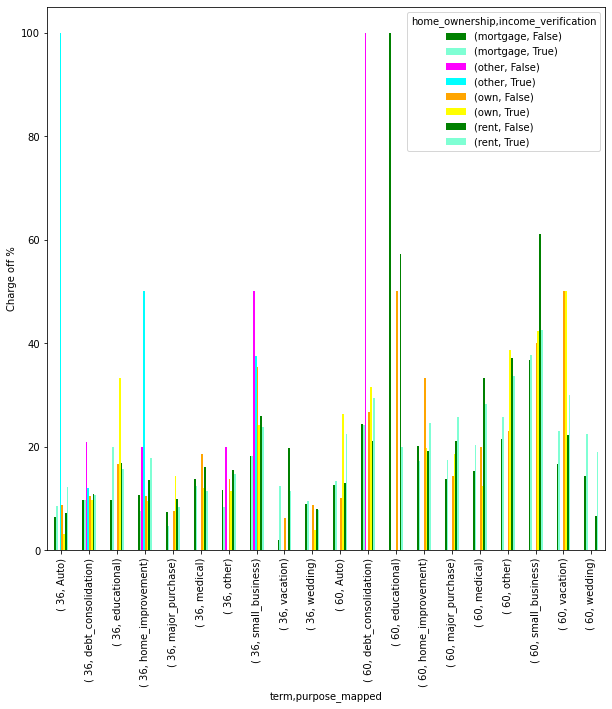

In [117]:
ind = ['term','purpose_mapped']
col = ['home_ownership','income_verification']

bivariate_ana(df1=charge_off,df2=segmented_df, ind1=ind, col1=col,ind2=ind, col2=col)

### Observation: Charge off % is highest in the below mentioned scenario.
Term is 60, Purpose is Debt Consolidation and Home Onwership is other and income verification is False
Term is 60, purpose is educational and Home Onwership is mortgage and income verification is False